In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [30]:
from mocap_labels import WALK_TRIALS, RUN_TRIALS, __walk_trials, __run_trials

print(f"Number of walk trials: {len(WALK_TRIALS)}")
print(f"Number of run trials: {len(RUN_TRIALS)}")

Number of walk trials: 31
Number of run trials: 27


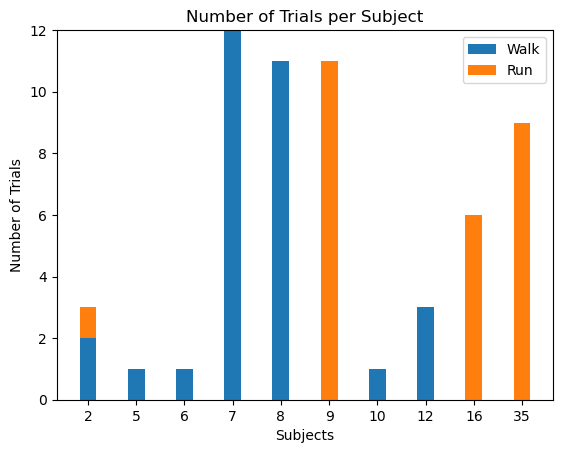

In [37]:
# make a bar chart with subjects on x axis and number of trials on y axis
# subjects are keys in the __walk_trials and __run_trials dictionaries
# number of trials is the length of the list of trials for each subject

walk_subjects = list(__walk_trials.keys())
run_subjects = list(__run_trials.keys())
all_subjects = sorted(list(set(walk_subjects + run_subjects)))

walk_trials = [len(__walk_trials.get(subject, [])) for subject in all_subjects]
run_trials = [len(__run_trials.get(subject, [])) for subject in all_subjects]

bar_width = 0.35
index = np.arange(len(all_subjects))
plt.bar(index, walk_trials, bar_width, label="Walk")
plt.bar(index, run_trials, bar_width, bottom=walk_trials, label="Run")
plt.xticks(index, all_subjects)
plt.xlabel("Subjects")
plt.ylabel("Number of Trials")
plt.title("Number of Trials per Subject")
plt.legend()

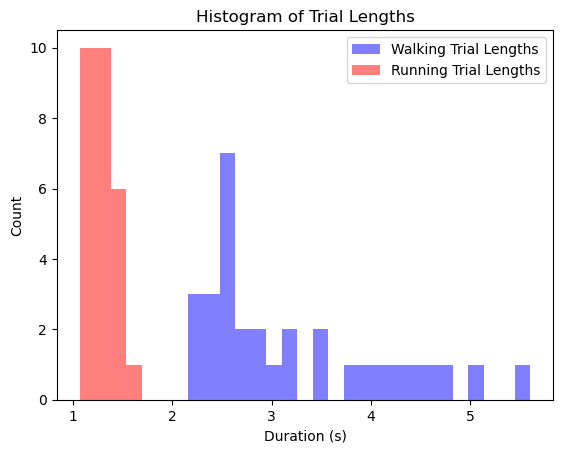

In [19]:


# Let's make histograms of the duration of each trial
walk_trial_lengths = [trial.n_frames / trial.fps for trial in WALK_TRIALS]
run_trial_lengths = [trial.n_frames / trial.fps for trial in RUN_TRIALS]

# Calculate the combined range of both datasets
min_length = min(min(walk_trial_lengths), min(run_trial_lengths))
max_length = max(max(walk_trial_lengths), max(run_trial_lengths))

# Define the bins using the combined range
bins = np.linspace(min_length, max_length, 30)

plt.hist(walk_trial_lengths, bins=bins, alpha=0.5, label='Walking Trial Lengths', color='blue')
plt.hist(run_trial_lengths, bins=bins, alpha=0.5, label='Running Trial Lengths', color='red')
plt.title('Histogram of Trial Lengths')
plt.xlabel('Duration (s)')
plt.ylabel('Count')
plt.legend()


In [20]:
# Let's convert all trials to dataframes

walk_dfs = [trial.as_dataframe() for trial in WALK_TRIALS]
run_dfs = [trial.as_dataframe() for trial in RUN_TRIALS]

In [21]:
# Let's see all the columns in the dataframes
print(walk_dfs[0].columns)

Index(['frame', 'time', 'root_tx', 'root_ty', 'root_tz', 'root_rx', 'root_ry',
       'root_rz', 'lfemur_rx', 'lfemur_ry', 'lfemur_rz', 'ltibia_rx',
       'lfoot_rx', 'lfoot_rz', 'ltoes_rx', 'rfemur_rx', 'rfemur_ry',
       'rfemur_rz', 'rtibia_rx', 'rfoot_rx', 'rfoot_rz', 'rtoes_rx',
       'lowerback_rx', 'lowerback_ry', 'lowerback_rz', 'upperback_rx',
       'upperback_ry', 'upperback_rz', 'thorax_rx', 'thorax_ry', 'thorax_rz',
       'lowerneck_rx', 'lowerneck_ry', 'lowerneck_rz', 'upperneck_rx',
       'upperneck_ry', 'upperneck_rz', 'head_rx', 'head_ry', 'head_rz',
       'lclavicle_ry', 'lclavicle_rz', 'lhumerus_rx', 'lhumerus_ry',
       'lhumerus_rz', 'lradius_rx', 'lwrist_ry', 'lhand_rx', 'lhand_rz',
       'lfingers_rx', 'lthumb_rx', 'lthumb_rz', 'rclavicle_ry', 'rclavicle_rz',
       'rhumerus_rx', 'rhumerus_ry', 'rhumerus_rz', 'rradius_rx', 'rwrist_ry',
       'rhand_rx', 'rhand_rz', 'rfingers_rx', 'rthumb_rx', 'rthumb_rz'],
      dtype='object')


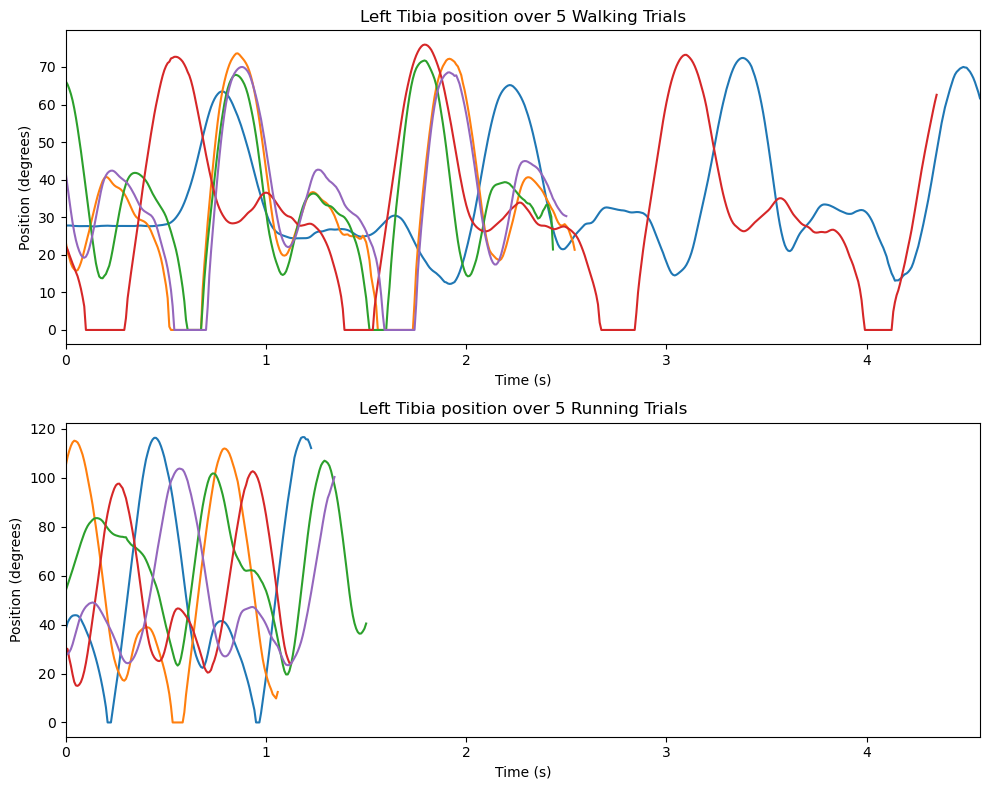

In [39]:
# Next, let's pick one body part: the left tibia, which is the shin bone
# We will plot the position of the tibia over time for trial
# We will plot walking and running on seperate plots, picking the 5 random trials of each

body_part_name = "Left Tibia"
body_part_key = 'ltibia_rx'
n_trials_to_plot = 5

random.seed(0)
random_walk_dfs = random.sample(walk_dfs, n_trials_to_plot)
random_run_dfs = random.sample(run_dfs, n_trials_to_plot)

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot for walking trials
axs[0].set_title(f'{body_part_name} position over {n_trials_to_plot} Walking Trials')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Position (degrees)')
for df in random_walk_dfs:
    axs[0].plot(df['time'], df[body_part_key])

# Plot for running trials
axs[1].set_title(f'{body_part_name} position over {n_trials_to_plot} Running Trials')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Position (degrees)')
for df in random_run_dfs:
    axs[1].plot(df['time'], df[body_part_key])

# Ensure both plots use the same time scale
max_time = max(df['time'].max() for df in random_walk_dfs + random_run_dfs)
axs[0].set_xlim(0, max_time)
axs[1].set_xlim(0, max_time)

plt.tight_layout()
plt.show()


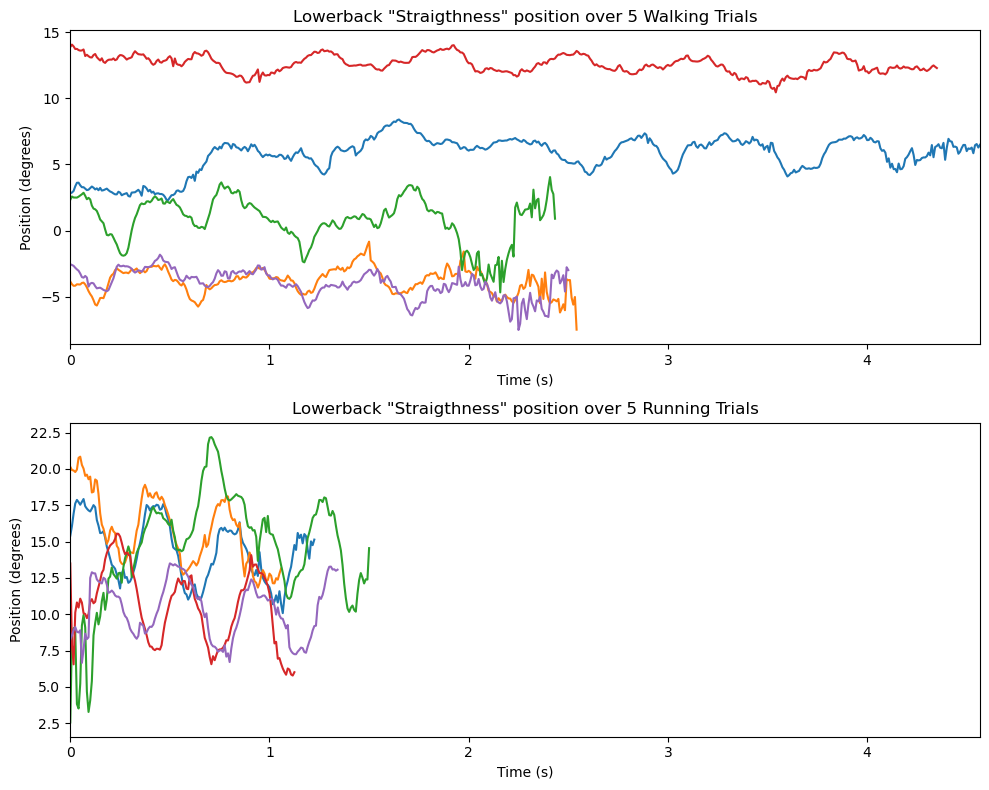

In [40]:
# Repeat the above for lower back straightness

body_part_name = "Lowerback \"Straigthness\""
body_part_key = 'lowerback_rx'

fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# Plot for walking trials
axs[0].set_title(f'{body_part_name} position over {n_trials_to_plot} Walking Trials')
axs[0].set_xlabel('Time (s)')
axs[0].set_ylabel('Position (degrees)')
for df in random_walk_dfs:
    axs[0].plot(df['time'], df[body_part_key])

# Plot for running trials
axs[1].set_title(f'{body_part_name} position over {n_trials_to_plot} Running Trials')
axs[1].set_xlabel('Time (s)')
axs[1].set_ylabel('Position (degrees)')
for df in random_run_dfs:
    axs[1].plot(df['time'], df[body_part_key])

# Ensure both plots use the same time scale
max_time = max(df['time'].max() for df in random_walk_dfs + random_run_dfs)
axs[0].set_xlim(0, max_time)
axs[1].set_xlim(0, max_time)

plt.tight_layout()
plt.show()